In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

In [2]:
df = pd.read_csv("Diabetes.csv")

In [3]:
le = LabelEncoder()
df['Outcome'] = le.fit_transform(df['Outcome'])

In [4]:
# 3. Split features/target
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [5]:
# 4. Feature scaling for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
# 6. Train models
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [8]:
# 7. Predictions
dt_preds = dt_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

In [9]:
# 8. Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"---- {model_name} ----")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}\n")
    return acc, prec, rec, f1


In [10]:
# 9. Model evaluation
dt_metrics = evaluate_model(y_test, dt_preds, "Decision Tree")
lr_metrics = evaluate_model(y_test, lr_preds, "Logistic Regression")

---- Decision Tree ----
Accuracy:  0.7208
Precision: 0.6341
Recall:    0.4815
F1-score:  0.5474
Confusion Matrix:
[[85 15]
 [28 26]]

---- Logistic Regression ----
Accuracy:  0.7143
Precision: 0.6087
Recall:    0.5185
F1-score:  0.5600
Confusion Matrix:
[[82 18]
 [26 28]]



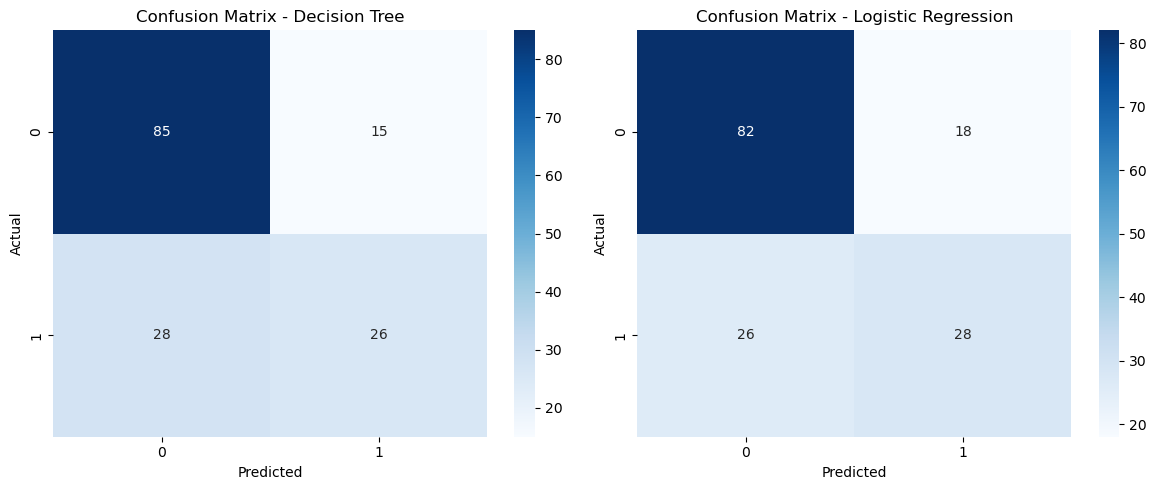

In [11]:
# 10. Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, preds, title in zip(axes, [dt_preds, lr_preds],
                            ["Decision Tree", "Logistic Regression"]):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix - {title}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

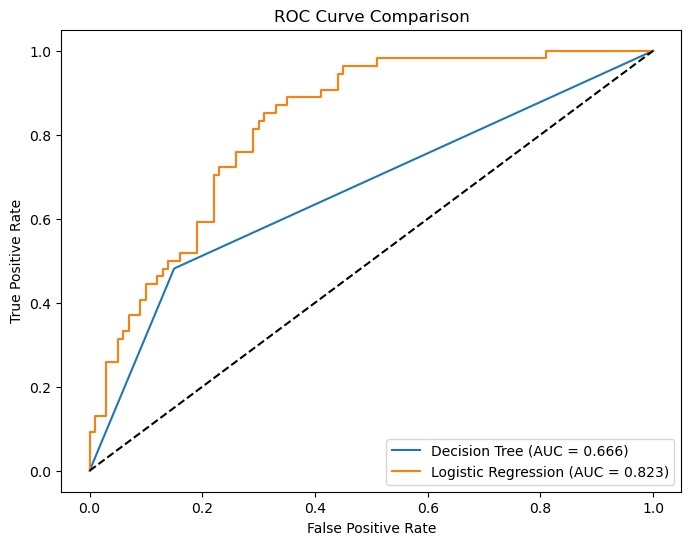

In [12]:
# 11. ROC Curve
dt_probs = dt_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.figure(figsize=(8,6))
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {auc(dt_fpr, dt_tpr):.3f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {auc(lr_fpr, lr_tpr):.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [13]:
# 12. Cross-Validation 
dt_cv_acc = cross_val_score(dt_model, X_scaled, y, cv=5, scoring='accuracy').mean()
lr_cv_acc = cross_val_score(lr_model, X_scaled, y, cv=5, scoring='accuracy').mean()

print(f"Decision Tree CV Accuracy: {dt_cv_acc:.4f}")
print(f"Logistic Regression CV Accuracy: {lr_cv_acc:.4f}")

Decision Tree CV Accuracy: 0.7176
Logistic Regression CV Accuracy: 0.7709


In [14]:
# 13. Model Recommendation
if dt_metrics[0] > lr_metrics[0]:
    print("✅ Recommended Model: Decision Tree (higher accuracy in test set).")
else:
    print("✅ Recommended Model: Logistic Regression (higher accuracy in test set).")

✅ Recommended Model: Decision Tree (higher accuracy in test set).
